# A2: NeuralNetwork Class

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Requirements" data-toc-modified-id="Requirements-1">Requirements</a></span></li><li><span><a href="#Code-for-NeuralNetwork-Class" data-toc-modified-id="Code-for-NeuralNetwork-Class-2">Code for <code>NeuralNetwork</code> Class</a></span></li><li><span><a href="#Example-Results" data-toc-modified-id="Example-Results-3">Example Results</a></span></li><li><span><a href="#Application-to-Boston-Housing-Data" data-toc-modified-id="Application-to-Boston-Housing-Data-4">Application to Boston Housing Data</a></span></li></ul></div>

## Requirements

In this assignment, you will complete the implementation of the `NeuralNetwork` class, starting with the code included in the next code cell.  Your implementation must meet the requirements described in the doc-strings.

Download [optimizers.tar](https://www.cs.colostate.edu/~anderson/cs545/notebooks/optimizers.tar) and extract `optimizers.py` for use in this assignment.

Then apply your `NeuralNetwork` class to the problem of predicting the value of houses in Boston as described below.

## Code for `NeuralNetwork` Class

In [27]:
%%writefile neuralnetwork.py

import numpy as np
import optimizers as opt


class NeuralNetwork():
    """
    A class that represents a neural network for nonlinear regression

    Attributes
    ----------
    n_inputs : int
        The number of values in each sample
    n_hidden_units_by_layers: list of ints, or empty
        The number of units in each hidden layer.
        Its length specifies the number of hidden layers.
    n_outputs: int
        The number of units in output layer
    all_weights : one-dimensional numpy array
        Contains all weights of the network as a vector
    Ws : list of two-dimensional numpy arrays
        Contains matrices of weights in each layer,
        as views into all_weights
    all_gradients : one-dimensional numpy array
        Contains all gradients of mean square error with
        respect to each weight in the network as a vector
    Grads : list of two-dimensional numpy arrays
        Contains matrices of gradients weights in each layer,
        as views into all_gradients
    total_epochs : int
        Total number of epochs trained so far
    error_trace : list
        Mean square error (standardized) after each epoch
    X_means : one-dimensional numpy array
        Means of the components, or features, across samples
    X_stds : one-dimensional numpy array
        Standard deviations of the components, or features, across samples
    T_means : one-dimensional numpy array
        Means of the components of the targets, across samples
    T_stds : one-dimensional numpy array
        Standard deviations of the components of the targets, across samples
        
    Methods
    -------
    make_weights_and_views(shapes)
        Creates all initial weights and views for each layer

    train(X, T, n_epochs, method='sgd', learning_rate=None, verbose=True)
        Trains the network using samples by rows in X and T

    use(X)
        Applies network to inputs X and returns network's output
    """

    def __init__(self, n_inputs, n_hidden_units_by_layers, n_outputs):
        """Creates a neural network with the given structure

        Parameters
        ----------
        n_inputs : int
            The number of values in each sample
        n_hidden_units_by_layers : list of ints, or empty
            The number of units in each hidden layer.
            Its length specifies the number of hidden layers.
        n_outputs : int
            The number of units in output layer

        Returns
        -------
        NeuralNetwork object
        """
 
        
        self.n_inputs = n_inputs
        self.n_outputs = n_outputs
        self.n_hidden_units_by_layers = n_hidden_units_by_layers
        self.Ws= []
        self.all_weights=np.empty([0,1])
        self.shapes=[]
 
    
        layer_n=n_inputs
        for layerI in range(len(self.n_hidden_units_by_layers)):
            layerI_N=self.n_hidden_units_by_layers[layerI]
            self.shapes.append([1 + layer_n, layerI_N])
            layer_n=layerI_N
        self.shapes.append([1 + layer_n, n_outputs])
        
        self.make_weights_and_views(self.shapes)
        self.all_gradients = []
        self.Grads = []
        self.total_epochs = 0
        self.error_trace = []
        self.X_means = None
        self.X_stds = None
        self.T_means = None
        self.T_stds = None
        self.Ys=None

    def make_weights_and_views(self, shapes):
        """Creates vector of all weights and views for each layer

        Parameters
        ----------
        shapes : list of pairs of ints
            Each pair is number of rows and columns of weights in each layer

        Returns
        -------
        Vector of all weights, and list of views into this vector for each layer
        """
 
        for layerI in range(len(shapes)):
            shapeX=shapes[layerI][0]
            shapeY=shapes[layerI][1]
            wI=1 / np.sqrt(shapeX) * np.random.uniform(-1, 1, size=(shapeX, shapeY))
            self.Ws.append(wI)
#           haha=np.vstack((self.all_weights,wI.reshape(-1,1)))
            self.all_weights=np.vstack((self.all_weights,wI.reshape(-1,1))) 
        self.all_weights=self.all_weights.flatten()
        # Create one-dimensional numpy array of all weights with random initial values
        #  ...

        # Build list of views by reshaping corresponding elements
        # from vector of all weights into correct shape for each layer.        
        # ...

    def __repr__(self):
        return f'NeuralNetwork({self.n_inputs}, ' + \
            f'{self.n_hidden_units_by_layers}, {self.n_outputs})'

    def __str__(self):
        s = self.__repr__()
        if self.total_epochs > 0:
            s += f'\n Trained for {self.total_epochs} epochs.'
            s += f'\n Final standardized training error {self.error_trace[-1]:.4g}.'
        return s
 
    def train(self, X, T, n_epochs, method='sgd', learning_rate=None, verbose=True):
        """Updates the weights 

        Parameters
        ----------
        X : two-dimensional numpy array
            number of samples  x  number of input components
        T : two-dimensional numpy array
            number of samples  x  number of output components
        n_epochs : int
            Number of passes to take through all samples
        method : str
            'sgd', 'adam', or 'scg'
        learning_rate : float
            Controls the step size of each update, only for sgd and adam
        verbose: boolean
            If True, progress is shown with print statements
        """

        # Calculate and assign standardization parameters
        # ...

        # Standardize X and T
        # ...

        # Instantiate Optimizers object by giving it vector of all weights
        self.X_means = np.mean(X, axis=0)
        self.X_stds = np.std(X, axis=0)
        self.T_means = np.mean(T, axis=0)
        self.T_stds = np.std(T, axis=0)
        # Standardize X and T

        X = (X - self.X_means) / self.X_stds
        T = (T - self.T_means) / self.T_stds
 
        # Instantiate Optimizers object by giving it vector of all weights
        optimizer = opt.Optimizers(self.all_weights)

        error_convert_f = lambda err: (np.sqrt(err) * self.T_stds)[0]
        
        # Call the requested optimizer method to train the weights.

        if method == 'sgd':
            error_trace=optimizer.sgd(self.error_f, self.gradient_f,fargs=[X,T],error_convert_f=error_convert_f,learning_rate=learning_rate,n_epochs=n_epochs,verbose=True)
        elif method == 'adam':
            error_trace=optimizer.adam(self.error_f, self.gradient_f,fargs=[X,T],error_convert_f=error_convert_f,learning_rate=learning_rate,n_epochs=n_epochs)
        elif method == 'scg':
            error_trace=optimizer.scg(self.error_f, self.gradient_f,fargs=[X,T],n_epochs=n_epochs)
        else:
            raise Exception("method must be 'sgd', 'adam', or 'scg'")
 
        self.total_epochs += len(error_trace)
        self.error_trace = error_trace



        self._forward(X)
        error = (T - self.Ys[-1]) * self.T_stds 
#       plt.plot(X, self.Ys[-1], 'o-', label='Model ')
#       errors.append(nnet.get_error_trace())
#       plt.plot(X, T, '*-', label='Train')
#       print(self.all_weights[20])
#       plt.plot(self.all_weights, '*-', label='w')

#       plt.show()

#       plt.draw()
#       plt.pause(0.00000001)
#       plt.clf()
 
        return self
    def addOnes(self,A):
        return np.insert(A, 0, 1, axis=1)
    
    def _forward(self, X):
        """Calculate outputs of each layer given inputs in X
        
        Parameters
        ----------
        X : input samples, standardized

        Returns
        -------
        Outputs of all layers as list
        """
        self.Ys = [X]
        i=0
        for layerI in range(len(self.shapes)):
            shapeX=self.shapes[layerI][0]
            shapeY=self.shapes[layerI][1]
            self.Ws[layerI]=self.all_weights[i:i+shapeX*shapeY].reshape(shapeX,shapeY)
            i+=shapeX*shapeY
        
        self.Ys=[]
        for layerI in range(len(self.n_hidden_units_by_layers)):
            X=np.tanh(self.addOnes(X) @ self.Ws[layerI])
            self.Ys.append(X)
        X=self.addOnes(X)@self.Ws[-1]
        self.Ys.append(X)
        # Append output of each layer to list in self.Ys, then return it.
        # ...

    # Function to be minimized by optimizer method, mean squared error
    def error_f(self, X, T):
        """Calculate output of net and its mean squared error 

        Parameters
        ----------
        X : two-dimensional numpy array
            number of samples  x  number of input components
        T : two-dimensional numpy array
            number of samples  x  number of output components

        Returns
        -------
        Mean square error as scalar float that is the mean
        square error over all samples
        """
        self._forward(X)
        
        error = (T - self.Ys[-1])

        MSE= np.mean(error**2)
        
        self.error_trace.append(MSE)
        
        return MSE
        # Call _forward, calculate mean square error and return it.
        # ...

    # Gradient of function to be minimized for use by optimizer method
    def gradient_f(self, X, T):
        """Returns gradient wrt all weights. Assumes _forward already called.

        Parameters
        ----------
        X : two-dimensional numpy array
            number of samples  x  number of input components
        T : two-dimensional numpy array
            number of samples  x  number of output components

        Returns
        -------
        Vector of gradients of mean square error wrt all weights
        """

        self._forward( X)
        # Assumes forward_pass just called with layer outputs saved in self.Ys.
        n_samples = X.shape[0]
        n_outputs = T.shape[1]
        n_layers = len(self.n_hidden_units_by_layers) + 1

        # D is delta matrix to be back propagated
        D = (T - self.Ys[-1]) /(n_samples * n_outputs) 
        self.Grads =  [None] *n_layers

        # Step backwards through the layers to back-propagate the error (D)
        for layeri in range(n_layers - 1, -1, -1):
            # gradient of all but bias weights
 
            # Back-propagate this layer's delta to previous layer
            if layeri > 0:
                self.Grads[layeri]= -self.addOnes(self.Ys[layeri-1]).T@D
                D =D@self.Ws[layeri][1:,:].T*(1-self.Ys[layeri-1]**2)  
            else:
                self.Grads[layeri]= -self.addOnes(X).T@D
         
        

#       self.all_gradients=


        self.all_gradients=np.empty([0,1])
        for layerI in range(n_layers):
             
#           haha=np.vstack((self.all_weights,wI.reshape(-1,1)))
            self.all_gradients=np.vstack((self.all_gradients,self.Grads[layerI].reshape(-1,1))) 
            
        self.all_gradients=self.all_gradients.flatten();
            
            
            
        return self.all_gradients


    def use(self, X):
        """Return the output of the network for input samples as rows in X

        Parameters
        ----------
        X : two-dimensional numpy array
            number of samples  x  number of input components, unstandardized

        Returns
        -------
        Output of neural network, unstandardized, as numpy array
        of shape  number of samples  x  number of outputs
        """

        X=(X-self.X_means)/self.X_stds
        self._forward( X)
        Y=self.Ys[-1]
        Y=Y*self.T_stds+self.T_means
        return Y 

    def get_error_trace(self):
        """Returns list of standardized mean square error for each epoch"""
        return self.error_trace

Overwriting neuralnetwork.py


## Example Results

Here we test the `NeuralNetwork` class with some simple data.  



method is sgd and rho is 0.01

sgd: Epoch 1 ObjectiveF=0.56994
sgd: Epoch 2 ObjectiveF=0.56994
sgd: Epoch 3 ObjectiveF=0.56994
sgd: Epoch 4 ObjectiveF=0.56994
sgd: Epoch 5 ObjectiveF=0.56994
sgd: Epoch 6 ObjectiveF=0.56994
sgd: Epoch 7 ObjectiveF=0.56993
sgd: Epoch 8 ObjectiveF=0.56993
sgd: Epoch 9 ObjectiveF=0.56993
sgd: Epoch 10 ObjectiveF=0.56993

method is adam and rho is 0.005

Adam: Epoch 1 ObjectiveF=0.56994
Adam: Epoch 2 ObjectiveF=0.56992
Adam: Epoch 3 ObjectiveF=0.56991
Adam: Epoch 4 ObjectiveF=0.56992
Adam: Epoch 5 ObjectiveF=0.56992
Adam: Epoch 6 ObjectiveF=0.56992
Adam: Epoch 7 ObjectiveF=0.56992
Adam: Epoch 8 ObjectiveF=0.56991
Adam: Epoch 9 ObjectiveF=0.56990
Adam: Epoch 10 ObjectiveF=0.56988

method is scg and rho is None

SCG: Epoch 1 ObjectiveF=1.00000
SCG: Epoch 2 ObjectiveF=1.00000
SCG: Epoch 3 ObjectiveF=1.00000
SCG: Epoch 4 ObjectiveF=0.99999
SCG: Epoch 5 ObjectiveF=0.99998
SCG: Epoch 6 ObjectiveF=0.99986
SCG: Epoch 7 ObjectiveF=0.99791
SCG: Epoch 8 ObjectiveF=0.

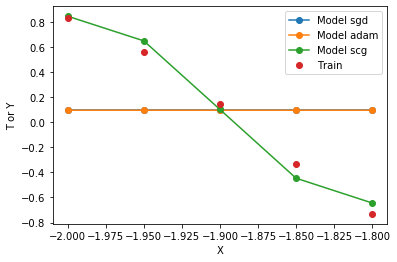

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import neuralnetwork as nn

X = np.arange(-2, 2, 0.05).reshape(-1, 1)
T = np.sin(X) * np.sin(X * 10)

# Just use first 5 samples
X = X[:5, :]
T = T[:5, :]

errors = []
# n_epochs = 1000
n_epochs = 10

method_rhos = [('sgd', 0.01),
               ('adam', 0.005),
               ('scg', None)]

for method, rho in method_rhos:
    
    print('\n=========================================')
    print(f'method is {method} and rho is {rho}')
    print('=========================================\n')

    nnet = nn.NeuralNetwork(X.shape[1], [2, 2], 1)
    
    # Set all weights here to allow comparison of your calculations
    # Must use [:] to overwrite values in all_weights.
    # Without [:], new array is assigned to self.all_weights, so self.Ws no longer refer to same memory
    nnet.all_weights[:] = np.arange(len(nnet.all_weights)) * 0.001
    
    nnet.train(X, T, n_epochs, method=method, learning_rate=rho)
    Y = nnet.use(X)
    plt.plot(X, Y, 'o-', label='Model ' + method)
    errors.append(nnet.get_error_trace())

plt.plot(X, T, 'o', label='Train')
plt.xlabel('X')
plt.ylabel('T or Y')
plt.legend();

sgd: Epoch 5000 ObjectiveF=0.53590
sgd: Epoch 10000 ObjectiveF=0.53508
sgd: Epoch 15000 ObjectiveF=0.39485
sgd: Epoch 20000 ObjectiveF=0.38634
sgd: Epoch 25000 ObjectiveF=0.38614
sgd: Epoch 30000 ObjectiveF=0.38609
sgd: Epoch 35000 ObjectiveF=0.38596
sgd: Epoch 40000 ObjectiveF=0.38566
sgd: Epoch 45000 ObjectiveF=0.38479
sgd: Epoch 50000 ObjectiveF=0.32441
Adam: Epoch 5000 ObjectiveF=0.38609
Adam: Epoch 10000 ObjectiveF=0.24194
Adam: Epoch 15000 ObjectiveF=0.08194
Adam: Epoch 20000 ObjectiveF=0.05404
Adam: Epoch 25000 ObjectiveF=0.04062
Adam: Epoch 30000 ObjectiveF=0.03615
Adam: Epoch 35000 ObjectiveF=0.03080
Adam: Epoch 40000 ObjectiveF=0.05015
Adam: Epoch 45000 ObjectiveF=0.02315
Adam: Epoch 50000 ObjectiveF=0.02015
SCG: Epoch 5000 ObjectiveF=0.51057
SCG: Epoch 10000 ObjectiveF=0.51056
SCG: Epoch 15000 ObjectiveF=0.31003
SCG: Epoch 20000 ObjectiveF=0.00050
SCG: Epoch 25000 ObjectiveF=0.00043
SCG: Epoch 30000 ObjectiveF=0.00041
SCG: Epoch 35000 ObjectiveF=0.00040
SCG: Epoch 40000 Obje

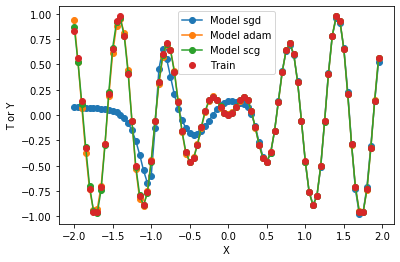

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import neuralnetwork as nn

X = np.arange(-2, 2, 0.05).reshape(-1, 1)
T = np.sin(X) * np.sin(X * 10)

errors = []
n_epochs = 1000
method_rhos = [('sgd', 0.02),
               ('adam', 0.01),
               ('scg', None)]

for method, rho in method_rhos:
    nnet = nn.NeuralNetwork(X.shape[1], [10, 10], 1)
    nnet.train(X, T, 50000, method=method, learning_rate=rho)
    Y = nnet.use(X)
    plt.plot(X, Y, 'o-', label='Model ' + method)
    errors.append(nnet.get_error_trace())

plt.plot(X, T, 'o', label='Train')
plt.xlabel('X')
plt.ylabel('T or Y')
plt.legend();

In [9]:
 len(errors) 
    
    

3

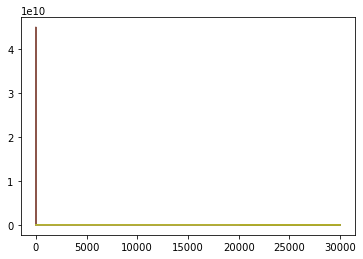

In [28]:
plt.figure(2)
plt.clf()
for error_trace in errors:
    plt.plot(error_trace)
 

Your results will not be the same, but your code should complete and make plots somewhat similar to these.

## Application to Boston Housing Data

Download data from [Boston House Data at Kaggle](https://www.kaggle.com/fedesoriano/the-boston-houseprice-data). Read it into python using the `pandas.read_csv` function.  Assign the first 13 columns as inputs to `X` and the final column as target values to `T`.  Make sure `T` is two-dimensional.

Before training your neural networks, partition the data into training and testing partitions, as shown here.

In [29]:

def partition(X, T, train_fraction):
    n_samples = X.shape[0]
    rows = np.arange(n_samples)
    np.random.shuffle(rows)
    
    n_train = round(n_samples * train_fraction)
    
    Xtrain = X[rows[:n_train], :]
    Ttrain = T[rows[:n_train], :]
    Xtest = X[rows[n_train:], :]
    Ttest = T[rows[n_train:], :]
    return [Xtrain, Ttrain, Xtest, Ttest]
def rmse(T, Y):
    return np.sqrt(np.mean((T - Y)**2))

sgd: Epoch 1000 ObjectiveF=2.94109
sgd: Epoch 2000 ObjectiveF=2.47927
sgd: Epoch 3000 ObjectiveF=2.28978
sgd: Epoch 4000 ObjectiveF=2.16065
sgd: Epoch 5000 ObjectiveF=2.06603
sgd: Epoch 6000 ObjectiveF=1.99730
sgd: Epoch 7000 ObjectiveF=1.93760
sgd: Epoch 8000 ObjectiveF=1.88292
sgd: Epoch 9000 ObjectiveF=1.83389
sgd: Epoch 10000 ObjectiveF=1.79255
method=[('sgd', 0.01), ('adam', 0.01), ('scg', None)]; structure=[10, 10]; number of epochs=10000;learning rate=0.01 RMSE=1.792549296372403
Adam: Epoch 1000 ObjectiveF=1.32746
Adam: Epoch 2000 ObjectiveF=1.07586
Adam: Epoch 3000 ObjectiveF=0.93113
Adam: Epoch 4000 ObjectiveF=0.86414
Adam: Epoch 5000 ObjectiveF=0.84013
Adam: Epoch 6000 ObjectiveF=0.82662
Adam: Epoch 7000 ObjectiveF=0.81171
Adam: Epoch 8000 ObjectiveF=0.80190
Adam: Epoch 9000 ObjectiveF=0.81256
Adam: Epoch 10000 ObjectiveF=0.78847
method=[('sgd', 0.01), ('adam', 0.01), ('scg', None)]; structure=[10, 10]; number of epochs=10000;learning rate=0.01 RMSE=0.7884746215717823
SCG: Ep

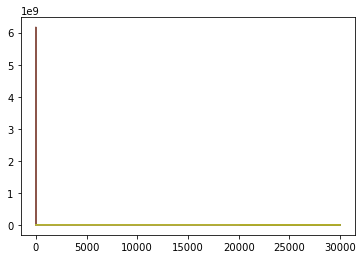

In [33]:
import pandas  # for reading csv file


# Assuming you have assigned `X` and `T` correctly.
data = pandas.read_csv('boston.csv', delimiter=',', decimal='.', usecols=range(14), na_values=-200)
data = data.dropna(axis=0)
 
data=data.to_numpy()
 
X=data[:,0:13]
T=data[:,-1].reshape(-1,1)
Xtrain, Train, Xtest, Ttest = partition(X, T, 0.8)  
errors = []
layersS=[ [10,10],
     [5, 5, 5],
     [20,20],
     ]

n_epochs = 10000
method_rhos = [  ('sgd',0.01),
                ('adam',0.01),
                    ('scg', None)]
  
for i in range(len(layersS)):
    for j in range (len(method_rhos)):
        method=method_rhos[j][0]
        rho=method_rhos[j][1]
        layer=layersS[i]
        nnet =NeuralNetwork(X.shape[1], layer,1)
        nnet.train(X, T, n_epochs, method=method, learning_rate=rho)
        Y = nnet.use(X)
        plt.plot(nnet.get_error_trace(), label='Model ' + method)
     
        errors.append(nnet.get_error_trace())
        print(f'method={method_rhos}; structure={layer}; number of epochs={n_epochs};learning rate={rho} RMSE={nnet.get_error_trace()[-1]}')
plt.show()
         


Write and run code using your `NeuralNetwork` class to model the Boston housing data. Experiment with all three optimization methods and a variety of neural network structures (numbers of hidden layer and units), learning rates, and numbers of epochs. Show results for at least three different network structures, learning rates, and numbers of epochs for each method.  Show your results using print statements that include the method, network structure, number of epochs, learning rate, and RMSE on training data and RMSE on testing data.

Try to find good values for the RMSE on testing data.  Discuss your results, including how good you think the RMSE values are by considering the range of house values given in the data. 

In [ ]:
1. sgd is the slowest 
2. adam is better than sgd but not as good as scg
3. scg is the best of all the three but took a little bit longer to run.
4. convergrnce highly depends on the rho values. If rho too large, it may not converge well.
5. Adding more layers seems can fit the data better.
6. considering the range of house values given in the data, I think the the RMSE values are very good.



# Grading

Your notebook will be run and graded automatically. Test this grading process by first downloading [A2grader.tar](http://www.cs.colostate.edu/~anderson/cs545/notebooks/A2grader.tar) and extract `A2grader.py` from it. Run the code in the following cell to demonstrate an example grading session.  The remaining 20 points will be based on your discussion of this assignment.

A different, but similar, grading script will be used to grade your checked-in notebook. It will include additional tests. You should design and perform additional tests on all of your functions to be sure they run correctly before checking in your notebook.  

For the grading script to run correctly, you must first name this notebook as 'Lastname-A2.ipynb' with 'Lastname' being your last name, and then save this notebook.

In [21]:
%run -i A2grader.py


======================= Code Execution =======================

Extracting python code from notebook named 'Chen-A2.ipynb' and storing in notebookcode.py
Removing all statements that are not function or class defs or import statements.

Testing

    import neuralnetwork as nn

    n_inputs = 3
    n_hiddens = [10, 20]
    n_outputs = 2
    n_samples = 5

    X = np.arange(n_samples * n_inputs).reshape(n_samples, n_inputs) * 0.1
    
    nnet = nn.NeuralNetwork(n_inputs, n_hiddens, n_outputs)
    nnet.all_weights[:] = 0.1  # set all weights to 0.1
    nnet.X_means = np.mean(X, axis=0)
    nnet.X_stds = np.std(X, axis=0)
    nnet.T_means = np.zeros((n_samples, n_outputs))
    nnet.T_stds = np.ones((n_samples, n_outputs))
    
    Y = nnet.use(X)


--- 40/40 points. Returned correct value.

Testing
    n_inputs = 3
    n_hiddens = [10, 500, 6, 3]
    n_samples = 5

    X = np.arange(n_samples * n_inputs).reshape(n_samples, n_inputs) * 0.1
    T = np.log(X + 0.1)
    n_outputs = T.shape[1

Adam: Epoch 500 ObjectiveF=0.13714
Adam: Epoch 1000 ObjectiveF=0.02471
Adam: Epoch 1500 ObjectiveF=0.00555
Adam: Epoch 2000 ObjectiveF=0.00470
Adam: Epoch 2500 ObjectiveF=0.00292
Adam: Epoch 3000 ObjectiveF=0.00197
Adam: Epoch 3500 ObjectiveF=0.00138
Adam: Epoch 4000 ObjectiveF=0.00118
Adam: Epoch 4500 ObjectiveF=0.00108
Adam: Epoch 5000 ObjectiveF=0.00104
Net 19 RMSE 0.00097
Adam: Epoch 500 ObjectiveF=0.04969
Adam: Epoch 1000 ObjectiveF=0.01562
Adam: Epoch 1500 ObjectiveF=0.00651
Adam: Epoch 2000 ObjectiveF=0.00351
Adam: Epoch 2500 ObjectiveF=0.00257
Adam: Epoch 3000 ObjectiveF=0.00210
Adam: Epoch 3500 ObjectiveF=0.00180
Adam: Epoch 4000 ObjectiveF=0.00160
Adam: Epoch 4500 ObjectiveF=0.00318
Adam: Epoch 5000 ObjectiveF=0.00134
Net 20 RMSE 0.00123
0.0015888611328669089

--- 40/40 points. Returned correct value.

HW Execution Grade is 80 / 80

 __ / 20 Results and discussion for Boston housing data.

HW FINAL GRADE is  _  / 100

Extra Credit:

Apply your functions to a data set from the

# Check-In <font color='red'>Changed Sept 14th, 8:45 AM</font>

Do not include this section in your notebook.

Name your notebook ```Lastname-A2.ipynb```.  So, for me it would be ```Anderson-A2.ipynb```.  

Combine your jupyter notebook file, your `neuralnetwork.py` file, and the `optimizers.py` file in one `tar` or `zip` file. Submit your `tar` or `zip` using the ```Assignment 2``` link on [Canvas](https://colostate.instructure.com/courses/131494).

# Extra Credit

Apply your multilayer neural network code to a regression problem using data that you choose 
from the [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets.php). Pick a dataset that
is listed as being appropriate for regression.